**Import libraries:**

In [23]:
import tobac
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import xarray as xr
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from itertools import groupby
%matplotlib inline

**Function for creating sample data:**

In [24]:
def make_simple_sample_data_2d(data_type = "iris"):
    from iris.cube import Cube
    from iris.coords import DimCoord, AuxCoord

    t_0 = datetime.datetime(2000, 1, 1, 12, 0, 0)

    x = np.arange(0, 100000, 1000)
    y = np.arange(0, 100000, 1000)
    t = t_0 + np.arange(0, 100, 1) * datetime.timedelta(minutes=1)
    xx, yy = np.meshgrid(x, y)

    t_temp = np.arange(0, 60, 1)
    track1_t = t_0 + t_temp * datetime.timedelta(minutes=1)
    x_0_1 = 10000
    y_0_1 = 10000
    track1_x = x_0_1 + 30 * t_temp * 60
    track1_y = y_0_1 + 14 * t_temp * 60
    track1_magnitude = 10 * np.ones(track1_x.shape)
    
    t_temp = np.arange(0, 30, 1)
    track2_t = t_0 + (t_temp + 15) * datetime.timedelta(minutes=1)
    x_0_2 = 40000
    y_0_2 = 50000
    track2_x = x_0_2 + 28 * t_temp * 60
    track2_y = y_0_2 + 13 * t_temp * 60
    track2_magnitude = 10 * np.ones(track2_x.shape)
    
    t_temp = np.arange(0, 30, 1)
    track3_t = t_0 + (t_temp + 30) * datetime.timedelta(minutes=1)
    x_0_3 = 4000
    y_0_3 = 51500
    track3_x = x_0_3 + 28 * t_temp * 60
    track3_y = y_0_3 + 13 * t_temp * 60
    track3_magnitude = 10 * np.ones(track3_x.shape)
    
    t_temp = np.arange(0, 30, 1)
    track4_t = t_0 + (t_temp + 20) * datetime.timedelta(minutes=1)
    x_0_4 = 9000
    y_0_4 = 4000
    track4_x = x_0_4 + 28 * t_temp * 60
    track4_y = y_0_4 + 13 * t_temp * 60
    track4_magnitude = 10 * np.ones(track4_x.shape)
    
    t_temp = np.arange(0, 30, 1)
    track5_t = t_0 + (t_temp + 20) * datetime.timedelta(minutes=1)
    x_0_5 = 9000
    y_0_5 = 80000
    track5_x = x_0_5 + 28 * t_temp * 60
    track5_y = y_0_5 + 13 * t_temp * 60
    track5_magnitude = 10 * np.ones(track5_x.shape)

    data = np.zeros((t.shape[0], y.shape[0], x.shape[0]))
    for i_t, t_i in enumerate(t):
        if np.any(t_i in track1_t):
            x_i = track1_x[track1_t == t_i]
            y_i = track1_y[track1_t == t_i]
            mag_i = track1_magnitude[track1_t == t_i]
            data[i_t] = data[i_t] + mag_i * np.exp(-np.power(xx - x_i, 2.0) / (2 * np.power(10000, 2.0))) * np.exp(-np.power(yy - y_i, 2.0) / (2 * np.power(10000, 2.0)))
        if np.any(t_i in track2_t):
            x_i = track2_x[track2_t == t_i]
            y_i = track2_y[track2_t == t_i]
            mag_i = track2_magnitude[track2_t == t_i]
            data[i_t] = data[i_t] + mag_i * np.exp(-np.power(xx - x_i, 2.0) / (2 * np.power(10000, 2.0))) * np.exp(-np.power(yy - y_i, 2.0) / (2 * np.power(10000, 2.0)))
        if np.any(t_i in track3_t):
            x_i = track3_x[track3_t == t_i]
            y_i = track3_y[track3_t == t_i]
            mag_i = track3_magnitude[track3_t == t_i]
            data[i_t] = data[i_t] + mag_i * np.exp(-np.power(xx - x_i, 2.0) / (2 * np.power(10000, 2.0))) * np.exp(-np.power(yy - y_i, 2.0) / (2 * np.power(10000, 2.0)))
        if np.any(t_i in track4_t):
            x_i = track4_x[track4_t == t_i]
            y_i = track4_y[track4_t == t_i]
            mag_i = track4_magnitude[track4_t == t_i]
            data[i_t] = data[i_t] + mag_i * np.exp(-np.power(xx - x_i, 2.0) / (2 * np.power(10000, 2.0))) * np.exp(-np.power(yy - y_i, 2.0) / (2 * np.power(10000, 2.0)))
        if np.any(t_i in track5_t):
            x_i = track5_x[track5_t == t_i]
            y_i = track5_y[track5_t == t_i]
            mag_i = track5_magnitude[track5_t == t_i]
            data[i_t] = data[i_t] + mag_i * np.exp(-np.power(xx - x_i, 2.0) / (2 * np.power(10000, 2.0))) * np.exp(-np.power(yy - y_i, 2.0) / (2 * np.power(10000, 2.0)))

    t_start = datetime.datetime(1970, 1, 1, 0, 0)
    t_points = (t - t_start).astype("timedelta64[ms]").astype(int) / 1000
    t_coord = DimCoord(t_points, standard_name="time", var_name="time", units="seconds since 1970-01-01 00:00")
    x_coord = DimCoord(x, standard_name="projection_x_coordinate", var_name="x", units="m")
    y_coord = DimCoord(y, standard_name="projection_y_coordinate", var_name="y", units="m")
    lat_coord = AuxCoord(24 + 1e-5 * xx, standard_name="latitude", var_name="latitude", units="degree")
    lon_coord = AuxCoord(150 + 1e-5 * yy, standard_name="longitude", var_name="longitude", units="degree")
    sample_data = Cube(
        data,
        dim_coords_and_dims=[(t_coord, 0), (y_coord, 1), (x_coord, 2)],
        aux_coords_and_dims=[(lat_coord, (1, 2)), (lon_coord, (1, 2))],
        var_name="w",
        units="m s-1",
    )

    if data_type == "xarray":
        sample_data = xr.DataArray.from_iris(sample_data)

    return sample_data

**Function for plotting sample data:**

In [25]:
def plot_data(section, mask, feat):
    section.isel(time=35).plot(x="x", y="y")
    contours_section = mask.isel(time=35).plot.contour(levels=[0.5], x="x", y="y", colors="white")
    features_frame = feat.loc[feat["frame"] == 35]
    for _, r in features_frame.iterrows():
        plt.plot(r["projection_x_coordinate"], r["projection_y_coordinate"], marker="x", ms=10, mew=3, color="white")

**Visualize sample data:**

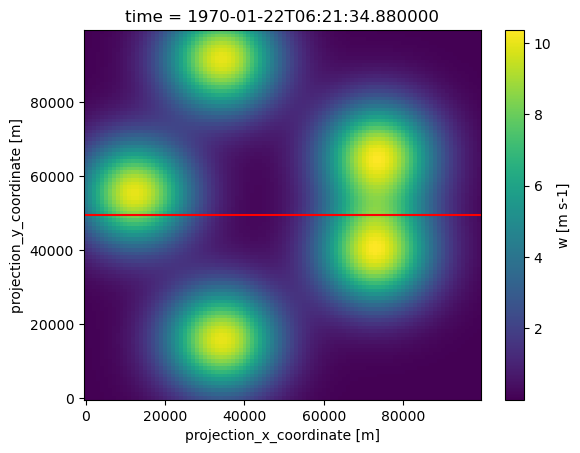

In [26]:
blob = make_simple_sample_data_2d()
dxy, dt = tobac.get_spacings(blob)
blob_xr = xr.DataArray.from_iris(blob).isel(time=35)

blob_xr.plot(x="x", y="y")
plt.axhline(y=blob_xr.y.max().item()/2, color='r', linestyle='-')

**Set parameters for feature detection and segmentation**

In [27]:
parameters_features = {'position_threshold': 'weighted_diff',
                       'sigma_threshold': 0.5,
                       'n_min_threshold': 5,
                       'target': 'maximum',
                       'threshold': [9]}

parameters_segmentation= {'target': 'maximum',
                          'method': 'watershed',
                          'threshold': 7}

**Perform undivided feature detection and segmentation for reference:**

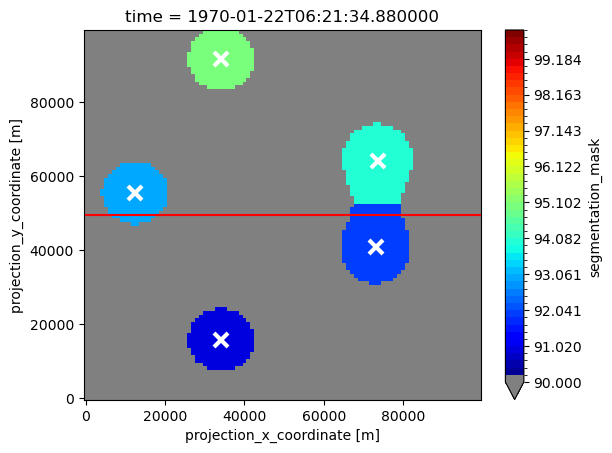

In [28]:
features = tobac.feature_detection_multithreshold(blob, dxy, **parameters_features)
frame = features.loc[features["frame"] == 35]

mask_seg, features_seg = tobac.segmentation_2D(features, blob, dxy, **parameters_segmentation)
mask_seg = xr.DataArray.from_iris(mask_seg)

cmap = plt.colormaps["jet"]
cmap_list = [cmap(i) for i in range(cmap.N)]
cmap_list[0] = (.5, .5, .5, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmap_list, cmap.N)
bounds = np.linspace(90, 100)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
mask_seg.isel(time=35).plot(cmap=cmap, norm=norm)

plt.axhline(y=blob_xr.y.max().item()/2, color='r', linestyle='-')
for _, row in frame.iterrows():
    plt.plot(row["projection_x_coordinate"], row["projection_y_coordinate"], marker="x", ms=10, mew=3, color="white")

**Cut image in half starting from bottom:**

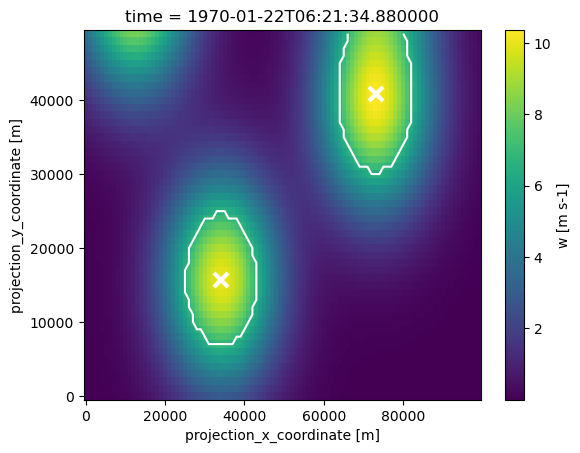

In [29]:
blob_section_bottom = xr.DataArray.from_iris(blob).isel(y=slice(0, int(blob_xr.sizes["y"] / 2)))
features_bottom = tobac.feature_detection_multithreshold(blob_section_bottom.to_iris(), dxy, **parameters_features)
mask_seg_bottom, _ = tobac.segmentation_2D(features_bottom, blob_section_bottom.to_iris(), dxy, **parameters_segmentation)
mask_seg_bottom = xr.DataArray.from_iris(mask_seg_bottom)
plot_data(blob_section_bottom, mask_seg_bottom, features_bottom)

**Get top image:**

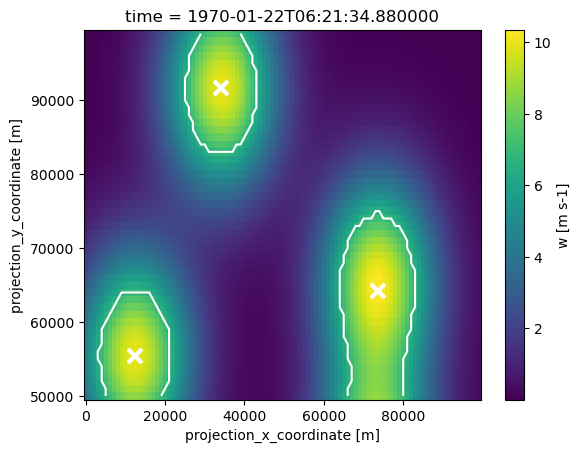

In [30]:
blob_section_top = xr.DataArray.from_iris(blob).isel(y=slice(int(blob_xr.sizes["y"] / 2), int(blob_xr.sizes["y"])))
features_top = tobac.feature_detection_multithreshold(blob_section_top.to_iris(), dxy, **parameters_features)
mask_seg_top, _ = tobac.segmentation_2D(features_top, blob_section_top.to_iris(), dxy, **parameters_segmentation)
mask_seg_top = xr.DataArray.from_iris(mask_seg_top)
plot_data(blob_section_top, mask_seg_top, features_top)

**Transfer features from bottom to top**

In [31]:
mask_df_bottom = mask_seg_bottom.isel(time=35).to_pandas()
mask_df_bottom = mask_df_bottom.reindex(index=mask_df_bottom.index[::-1])

top_row = mask_df_bottom.head(1).transpose()
y_coordinate = mask_df_bottom.head(1).index.item() + dxy
column_name = top_row.columns.item()
top_row = top_row[(top_row.T != 0).any()]
indices_list = list(top_row.index)
indices = np.split(indices_list, np.where(np.diff(indices_list) != dxy)[0] + 1)

top_row = top_row.reset_index(names="index")
new_features = pd.DataFrame()
for a in indices:
    marker = np.mean(a)
    feature = top_row.iloc[(top_row["index"] - marker).abs().argsort()[:1]][column_name].item()
    feature_row = features_bottom.loc[features_bottom["feature"] == feature]
    feature_row.loc[:, "distance"] = int(blob_xr.sizes["y"] / 2) - feature_row.loc[:, "hdim_1"]
    feature_row.loc[:, "length"] = a.size
    feature_row.loc[:, "hdim_1"] = 0
    feature_row.loc[:, "hdim_2"] = marker / dxy
    feature_row.loc[:, "projection_y_coordinate"] = y_coordinate
    feature_row.loc[:, "projection_x_coordinate"] = marker
    new_features = pd.concat([new_features, feature_row])

In [32]:
#features_c = pd.concat([features_top, new_features])
#features_c.sort_values(inplace=True, by=['frame'])
#features_c.reset_index(inplace=True, drop=True)
#mask_seg, _ = tobac.segmentation_2D(features_c, blob_section_top.to_iris(), dxy, **parameters_segmentation)
#mask_seg = xr.DataArray.from_iris(mask_seg)
#plot_data(blob_section_top, mask_seg, features_c)

**Transfer features from top to bottom**

In [33]:
mask_df_top = mask_seg_top.isel(time=35).to_pandas()
mask_df_top = mask_df_top.reindex(index=mask_df_top.index[::-1])

bottom_row = mask_df_top.tail(1).transpose()
y_coordinate = mask_df_top.tail(1).index.item() - dxy
column_name = bottom_row.columns.item()
bottom_row = bottom_row[(bottom_row.T != 0).any()]
indices_list = list(bottom_row.index)
indices = np.split(indices_list, np.where(np.diff(indices_list) != dxy)[0] + 1)

bottom_row = bottom_row.reset_index(names="index")
#new_features = pd.DataFrame()
for a in indices:
    marker = np.mean(a)
    feature = bottom_row.iloc[(bottom_row["index"] - marker).abs().argsort()[:1]][column_name].item()
    feature_row = features_top.loc[features_top["feature"] == feature]
    feature_row.loc[:, "distance"] = feature_row.loc[:, "hdim_1"]
    feature_row.loc[:, "length"] = a.size
    feature_row.loc[:, "hdim_1"] = y_coordinate / dxy
    feature_row.loc[:, "hdim_2"] = marker / dxy
    feature_row.loc[:, "projection_y_coordinate"] = y_coordinate
    feature_row.loc[:, "projection_x_coordinate"] = marker
    new_features = pd.concat([new_features, feature_row])

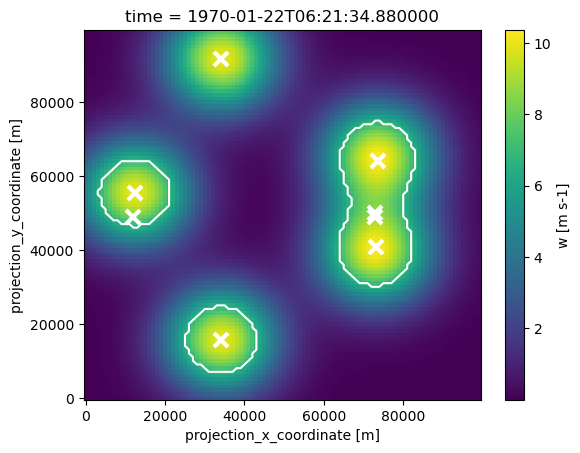

In [34]:
features_merged = pd.concat([features_top, features_bottom, new_features])
features_merged.sort_values(inplace=True, by=['frame'])
features_merged.reset_index(inplace=True, drop=True)

mask_seg, _ = tobac.segmentation_2D(features_merged, blob, dxy, **parameters_segmentation)
mask_seg = xr.DataArray.from_iris(mask_seg)
plot_data(xr.DataArray.from_iris(blob), mask_seg, features_merged)

In [193]:
#mask_df_top = mask_seg.isel(time=35).to_pandas()
#mask_df_top = mask_df_top.reindex(index=mask_df_top.index[::-1])
#
#merged_mask = pd.concat([mask_df_top, mask_df_bottom])
#    
#for column in merged_mask:
#    if merged_mask[column].iloc[int(blob_xr.sizes["y"]/2) - 1] != 0 and merged_mask[column].iloc[int(blob_xr.sizes["y"]/2)] != 0:
#        merged_mask = merged_mask.replace(merged_mask[column].iloc[int(blob_xr.sizes["y"]/2) - 1], merged_mask[column].iloc[int(blob_xr.sizes["y"]/2)])
#

1
